<a href="https://colab.research.google.com/github/GabrielChuchuca/SIMULACION/blob/main/Deber4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install simpy

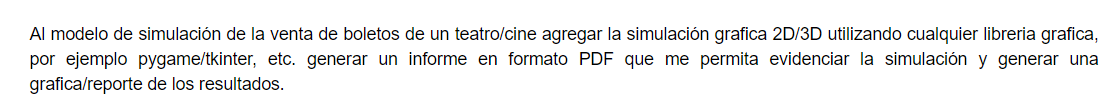

In [2]:
import collections
import random
import simpy

In [3]:
NUM_BOLETO = 50
TIEMPO_SIMULACION = 120

def ventaBoletos(env, num_boletos, pelicula, teatro):
  with teatro.contador.request() as turno:
    resultado = yield turno | teatro.sold_out[pelicula]
    if turno not in resultado:
      teatro.num_renegados[pelicula] += 1
      return
    if teatro.num_boletos[pelicula] < num_boletos:
      yield env.timeout(0.5) 
      return
    teatro.num_boletos[pelicula] -= num_boletos
    if teatro.num_boletos[pelicula] < 2:
      teatro.sold_out[pelicula].succeed()
      teatro.tiempo_agotado[pelicula] = env.now
      teatro.num_boletos[pelicula] = 0
    yield env.timeout(1)


def llegadaClientes(env, teatro):
  while True:
    yield env.timeout(random.expovariate(1/0.5))
    pelicula = random.choice(teatro.peliculas)
    num_boletos = random.randint(1, 6)
    if teatro.num_boletos[pelicula]:
      env.process(ventaBoletos(env, num_boletos, pelicula, teatro))


Teatro = collections.namedtuple('Teatro', 'contador, peliculas, num_boletos, sold_out, tiempo_agotado, num_renegados')

print('Teatro Carlos Crespi - UPS')
env = simpy.Environment()

contador = simpy.Resource(env,capacity=1)
peliculas = ['Conjuro 3', 'Rapidos y Furiosos 10', 'Pulp Fictions']
num_boletos = {pelicula: NUM_BOLETO for pelicula in peliculas}
sold_out = {pelicula: env.event() for pelicula in peliculas}
tiempo_agotado = {pelicula: None for pelicula in peliculas}
num_renegados = {pelicula: 0 for pelicula in peliculas}

teatro = Teatro(contador, peliculas, num_boletos, sold_out, tiempo_agotado, num_renegados)
env.process(llegadaClientes(env, teatro))
env.run(until=TIEMPO_SIMULACION)

# Analisis y resultados
for pelicula in peliculas:
  if teatro.sold_out[pelicula]:
    print('Pelicula: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula]))
    print('Numero de personas que salieron de la fila/renegados %s' %teatro.num_renegados[pelicula])

Teatro Carlos Crespi - UPS
Pelicula: Conjuro 3 se agoto en el tiempo 51.0 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 14
Pelicula: Rapidos y Furiosos 10 se agoto en el tiempo 54.5 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 8
Pelicula: Pulp Fictions se agoto en el tiempo 44.0 despues de salir a la venta
Numero de personas que salieron de la fila/renegados 10


In [4]:
VELOCIDAD_LLEGADA = 42
NUM_BOLETO = 50
TIEMPO_SIMULACION = 120

In [5]:
def ventaBoletos(env, num_boletos, pelicula, teatro):
  with teatro.contador.request() as turno:
    resultado = yield turno | teatro.sold_out[pelicula]
    if turno not in resultado:
      teatro.num_renegados[pelicula] += 1
      return
    if teatro.num_boletos[pelicula] < num_boletos:
      yield env.timeout(0.5) 
      return
    teatro.num_boletos[pelicula] -= num_boletos
    if teatro.num_boletos[pelicula] < 2:
      teatro.sold_out[pelicula].succeed()
      teatro.tiempo_agotado[pelicula] = env.now
      teatro.num_boletos[pelicula] = 0
    yield env.timeout(1)


def llegadaClientes(env, teatro):
  while True:
    yield env.timeout(random.expovariate(1/0.5))
    pelicula = random.choices(teatro.peliculas, teatro.probabilidad, k=1)
    num_boletos = random.randint(1, 6)
    if teatro.num_boletos[pelicula[0]]:
      env.process(ventaBoletos(env, num_boletos, pelicula[0], teatro))

def process_run(vel,nboleto,tsimulacion):   
    
    VELOCIDAD_LLEGADA = vel
    NUM_BOLETO = nboleto
    TIEMPO_SIMULACION = tsimulacion
    
    resultado = ""
    
    Teatro = collections.namedtuple('Teatro', 'contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados')

    print('Teatro Carlos Crespi - UPS')
    env = simpy.Environment()

    contador = simpy.Resource(env,capacity=1)
    peliculas = ['Conjuro 3', 'Rapidos y Furiosos 10', 'Pulp Fictions']
    probabilidad=[0.1, 0.3, 0.6]
    num_boletos = {pelicula: NUM_BOLETO for pelicula in peliculas}
    sold_out = {pelicula: env.event() for pelicula in peliculas}
    tiempo_agotado = {pelicula: None for pelicula in peliculas}
    num_renegados = {pelicula: 0 for pelicula in peliculas}

    teatro = Teatro(contador, peliculas, probabilidad, num_boletos, sold_out, tiempo_agotado, num_renegados)
    env.process(llegadaClientes(env, teatro))
    env.run(until=TIEMPO_SIMULACION)

    # Analisis y resultados
    for pelicula in peliculas:
      if teatro.sold_out[pelicula]:
        
        print('Pelicula: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula]))
        sms1 = 'Pelicula: %s se agoto en el tiempo %.1f despues de salir a la venta' %(pelicula, teatro.tiempo_agotado[pelicula])
        print('Numero de personas que salieron de la fila/renegados %s' %teatro.num_renegados[pelicula])
        sms2 = 'Numero de personas que salieron de la fila/renegados %s' %teatro.num_renegados[pelicula]
        resultado = resultado + "\n" + sms1 +"\n"+ sms2
    return resultado

In [6]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox

In [7]:
ventana = Tk()
ventana.geometry("500x500")
ventana.title("Simulación de boleteria peliculas")
ventana.resizable(0,0)

txvelocidad=StringVar()
velocidad = Label(ventana,text="Velocidad", width=10).place(x=15, y=10)
txtvelocidad = ttk.Entry(ventana, textvariable=txvelocidad).place(x=150,y=10)

txnboleto=StringVar()
nboleto = Label(ventana,text="Numero de boletos", width=20).place(x=5, y=40)
txtnboleto = ttk.Entry(ventana, textvariable=txnboleto).place(x=150,y=40)

txsimulacion=StringVar()
simulacion = Label(ventana,text="Tiempo de simulacion", width=20).place(x=10, y=70)
txtsimulacion = ttk.Entry(ventana,textvariable=txsimulacion).place(x=150,y=70)


def guardar():
    vel = txvelocidad.get()
    nbol=txnboleto.get()
    sim=txsimulacion.get()
    
    res = process_run(vel=int(vel),nboleto=int(nbol),tsimulacion=int(sim))
    print("resp ",res)
    #tk.messagebox.showinfo(title="Resultado de simulacion", message=res, **options)
    messagebox.showinfo(message=res,title="Resultado de simulación")
    

Button(ventana, text="Correr", command=guardar).place(x=100, y=150)

ventana.mainloop()

TclError: ignored